# Tutorial Pandas
## Por Germano Yoneda



# Introdução

Neste microcurso, você irá aprender sobre o pandas, a biblioteca mais popular para análise de dados.

Importando a biblioteca


In [ ]:
#Caso não tenha instalado remova o # execute e reinicie o kernel.
#pip install pandas

In [172]:
import pandas as pd

# Parte 1

# Criando dados

Existem dois tipos de objetos no pandas: DataFrame e Series.
	DataFrame - Considerados uma tabela. O DataFrame contém uma lista de entradas individuais, cada uma com um certo valor. Cada entrada corresponde a uma linha e a uma coluna.
	Por exemplo, considere o seguinte DataFrame:

In [173]:
#Dicionário no qual as chaves são o nome das colunas - e os valores são os valores em formato de lista
pd.DataFrame({'Yes': [550, 28], 'No': [50, 20]})

,Yes,No
0,550,50
1,28,20


In [174]:
#As entradas do DataFrame não estão limitadas a inteiros. Por exemplo, aqui temos um DataFrame com valores de Strings:
pd.DataFrame({'João': ['Não gostei','Estava péssimo.'], 'Joana': ['Muito bom', 'Perfeito.']})

,João,Joana
0,Não gostei,Muito bom
1,Estava péssimo.,Perfeito.


Nós estamos usando o construtor pd.DataFrame() para gerar esses objetos DataFrame. A sintaxe para declarar um novo dicionário o qual as chaves são os nomes das colunas (João e Joana nesse exemplo), e os quais são listas de entradas.
	Este é uma maneira padrão de se construir um DataFrame, e um jeito mais comum de ser encontrado.
	
O construtor da lista de dicionários define valores aos rótulos das colunas, mas apenas contadores a partir do 0 para os rótulos das linhas. Às vezes isso é OK, mas vezes nós iremos querer atribuir esses títulos.

A lista de título das linhas usada num DataFrame é chamado de Index. Nós podemos atribuir valores usando o parâmetro index no nosso construtor.


In [175]:
pd.DataFrame({'João': ['Não gostei','Estava péssimo.'], 'Joana': ['Muito bom', 'Perfeito.']},
             index=['Barra de Serial da Marca DataFrame', 'Whey da marca DataFrame'])

,João,Joana
Barra de Serial da Marca DataFrame,Não gostei,Muito bom
Whey da marca DataFrame,Estava péssimo.,Perfeito.


# Séries
Uma série, por contraste é uma sequência de dados. Se o DataFrame é uma tabela então as séries são as listas. E de fato você pode criar uma com uma lista:


In [176]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [177]:
pd.Series(i for i in range(1,6))

0    1
1    2
2    3
3    4
4    5
dtype: int64

Uma Série é, por essência, uma coluna simples do DataFrame. Então você pode atribuir um valor de coluna para uma série da mesma forma que antes, usando index dentro do construtor. Entretanto, uma Série não apresenta o nome das colunas, apenas contém um elemento name.


In [178]:
pd.Series([35, 38, 48], index=['Vendas de 2017', 'Vendas de 2018', 'Vendas de 2019'], name='Casas')

Vendas de 2017    35
Vendas de 2018    38
Vendas de 2019    48
Name: Casas, dtype: int64

As Séries e os DataFrames estão intimamente relacionados. É útil pensar num DataFrame como um aglomerado de Séries coladas.


# Trabalhando com dados "reais"

In [179]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [180]:
#avaliando o tamanho do dataset
wine.shape

(1599, 12)

Então o nosso DataFrame tem 1599 gravações divididas em 12 colunas.

Nós podemos examinar as primeiras 5 linhas do DataFrame usando o comando:


In [181]:
#avaliando as primeiras 5 linhas
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [182]:
# e as 5 últimas linhas
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Indexação, seleção e atribuição

	Para acessar itens das colunas basta usar as notações de acesso “.” ou [“nome da coluna”], por exemplo:


In [183]:
#Criando uma "cópia" dataset original
red_wine = wine.copy()

In [185]:
wine.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [186]:
#ou 
wine['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Essas são as duas maneiras de selecionar uma série específica de um DataFrame. 

Nenhuma delas é mais ou menos correta em relação à sintaxe do que a outra. Entretanto o operador [] tem certa vantagem pois pode lidar com colunas que possuam caracteres especiais(como espaço por exemplo).

	Uma Serie pandas nada mais é do que um dicionário rebuscado, caso queiramos acessar valores mais específicos podemos usar o indexador [] mais que uma vez, conforme o exemplo:


In [187]:
wine['quality'][0]

5

Indexação no pandas
O operador indexador e o atributo de seleção são ótimos porque eles funcionam de maneira similar ao resto das coisas no Python. Como um iniciante, isso torna as coisas mais fáceis de serem aprendidas e utilizadas.

Entretanto, a biblioteca pandas tem seus próprios operadores loc e iloc.

Para operações mais avançadas, esses são alguns indexadores que você poderá usar.
Seleção baseada no índice:

A indexação do pandas funciona usando dois paradigmas. **O primeiro é a seleção baseada no índice(Iloc sendo I de índice)**: selecionando os dados **baseados na posição numérica**. A função iloc segue esse paradigma.
Para selecionar a primeira linha de dados de um DataFrame, nós podemos usar o seguinte:


In [188]:
#Pegando as informações da primeira linha
wine.iloc[0]

fixed acidity            7.4000
volatile acidity         0.7000
citric acid              0.0000
residual sugar           1.9000
chlorides                0.0760
free sulfur dioxide     11.0000
total sulfur dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 0, dtype: float64


Tanto iloc quanto loc se referem as linhas primeiro, depois colunas. Isso é o oposto do Python nativo, que colunas vem antes das linhas.
Isso quer dizer que é mais fácil obter linhas do que colunas. Para obter uma coluna com iloc nós podemos fazer o seguinte:


In [189]:
#pegando as informações da primeira coluna
wine.iloc[:, 0]

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

O operador “:” significa tudo no python nativo. Quando combinado com outros seletores, entretanto, ele pode ser usado para indicar uma variedade de valores. Por exemplo, para selecionar fixed acidity (coluna) apenas para a primeira, segunda e terceira linha, nós faríamos:


In [190]:
wine.iloc[:3, 0]

0    7.4
1    7.8
2    7.8
Name: fixed acidity, dtype: float64

In [191]:
#Ou para selecionar apenas a segunda e terceira linha:
wine.iloc[1:3, 0]

1    7.8
2    7.8
Name: fixed acidity, dtype: float64

In [193]:
#também é possível passar uma lista:
wine.iloc[[0, 1, 2], [0,2]]

,fixed acidity,citric acid
0,7.4,0.00
1,7.8,0.00
2,7.8,0.04



Finalmente, é útil saber que números negativos também podem ser usados para seleção. Isso irá começar a contar do final dos valores. Por exemplo os últimos cinco elementos de um conjunto de dados.


In [196]:
wine.iloc[5:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Seleção baseada em título

	O segundo paradigma de seleção de atributos é o operador loc : index-based selection. Neste paradigma é o valor dos dados e não a posição, que importa.
	Por exemplo, para pegar o primeiro valor do DataFrame wine, nós faríamos:


In [195]:
#Pegando o primeiro valor da coluna fixed acidity
wine.loc[0, 'fixed acidity']

7.4

iloc é mais simples do que loc porque ignora o nome das colunas do conjunto de dados. 

**Quando nós usamos iloc nós tratamos o conjunto de dados como uma grande matriz, que temos que indexar por posição**. **loc, por contraste, usa as informações nos índices para fazer isso funcionar**. Uma vez que seu conjunto de dados geralmente têm índices com algum sentido, é mais fácil usar loc.

Por exemplo, aqui temos uma operação muito mais fácil usando loc:


In [197]:
wine.loc[:, ['fixed acidity', 'volatile acidity', 'quality']]

,fixed acidity,volatile acidity,quality
0,7.4,0.700,5
1,7.8,0.880,5
2,7.8,0.760,5
3,11.2,0.280,6
4,7.4,0.700,5
...,...,...,...
1594,6.2,0.600,5
1595,5.9,0.550,6
1596,6.3,0.510,6
1597,5.9,0.645,5


# Escolhendo entre loc e iloc

Quando estamos escolhendo entre loc e iloc, há uma “pegadinha” que vale a pena lembrar, que é quando os dois métodos usam esquemas de **indexação ligeiramente diferentes**.

**Iloc** o sistema de indexação stdlib, onde **o primeiro elemento numa série é incluído e o último é excluído**. **Então 0:10 seleciona itens entre 0 e 9**. *loc por sua vez selecionará os itens de 0 a 10*.

Essa particularidade confunde, principalmente quando o índice do  DataFrame é uma simples lista numérica.

**Neste caso df.iloc[0:1000] irá retornar 1000 entradas e df.loc[0:1000] irá retornar 1001 entradas!
Fora isso, a semântica de ambas é igual**


#  Manipulando os índices
A seleção baseada em títulos se deriva dos títulos do índice. Criticamente, o índice que usamos não é imutável. Nós podemos manipular o índice da maneira que quisermos.

O método set_index() pode ser usado para fazer o trabalho:


In [198]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [199]:
dic_quality = {
    3 : 'Péssimo',
    4 : 'Regular',
    5 : 'Bom',
    6 : 'Muito bom',
    7 : 'Excelente',
    8 : 'Excepcional',
}

In [200]:
#Aqui nós utilizamos o dicionário criado acima para criar variáveis categóricas de acordo com a coluna quality
# E atribuímos a outra coluna chamada label
wine['label'] = wine['quality'].map(dic_quality)

In [202]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bom
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bom
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bom
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Muito bom
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bom


In [203]:
wine.set_index("label",inplace=True)
wine.head(3)
#Isso é particularmente útil se quiser criar um índice para os conjuntos melhor do que o atual.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
label,,,,,,,,,,,,
Bom,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
Bom,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
Bom,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [204]:
#Se quisermos resetar o índice:
wine.reset_index(inplace=True)
wine.head(1)

,label,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Bom,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Reorganizando colunas!

In [205]:
wine = wine[[ 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'label','quality']]

In [206]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom,5


# Seleções condicionais

Até agora nós indexamos vários dados, usando propriedades estruturais dos DataFrames. Para fazermos coisas interessantes com os dados nós precisamos criar questões baseadas em condições.

Por exemplo, suponha que você estar interessado especificamente em vinhos com label igual a Bom:


In [207]:
wine.label == 'Bom'

0        True
1        True
2        True
3       False
4        True
        ...  
1594     True
1595    False
1596    False
1597     True
1598    False
Name: label, Length: 1599, dtype: bool

Esta operação produz uma Série True/False baseada no país de cada dado. Esse resultado pode ser usado dentro de um loc para selecionar apenas dados relevantes:


In [208]:
#Selecionando apenas as linhas com label == Bom
wine.loc[wine.label == 'Bom']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bom,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bom,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,Bom,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,Bom,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,Bom,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,Bom,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bom,5


Esse DataFrame tem 681 linhas, enquanto o original tem 1599. Isso significa que aproximadamente 42% dos vinhos são bons.

Nós queremos vinhos acima da média, vamos supor, pelo menos a qualidade maior do que 6 pontos e `residual sugar` menor do que 2.

Nós podemos usar o e comercial (&) para trazer as duas perguntas ao mesmo tempo.


In [209]:
wine.loc[(wine.quality > 5) & (wine['residual sugar'] < 2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Muito bom,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,Excelente,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,Excelente,7
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,Muito bom,6
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,Muito bom,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,6.8,0.67,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,Muito bom,6
1587,5.8,0.61,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,Muito bom,6
1590,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,Muito bom,6
1591,5.4,0.74,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,Muito bom,6


No caso do **ou**, podemos usar o operador pipe (|):


In [210]:
wine.loc[(wine.quality > 5) | (wine['residual sugar'] < 2)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Muito bom,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,Bom,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,Bom,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Muito bom,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,Muito bom,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Muito bom,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Muito bom,6


O pandas vem com alguns poucos seletores condicionais, dos quais dois estão exemplificados aqui.

O primeiro é isin. que permite que você selecione valores que estão em uma lista de valores. 

Por exemplo, aqui está como nós podemos usar isso para selecionar apenas vinhos que são bons ou muito bons.


In [211]:
wine.loc[wine.label.isin(['Bom', 'Muito bom'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bom,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bom,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Muito bom,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bom,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Muito bom,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Muito bom,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Bom,5


O segundo operador é o isnull (e seu companheiro notnull). Esses métodos permitem que você selecione valores nulos (ou não). Por exemplo, para filtrar vinhos sem preço(retirar) no nosso conjunto de dados, aqui está o que faríamos:


In [212]:
import random
import numpy

In [214]:
price_list = [round(i,0) for i in numpy.random.rand(len(wine)) * 50]

In [215]:
wine['price'] = price_list

In [216]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality,price
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom,5,42.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bom,5,32.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bom,5,13.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Muito bom,6,28.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom,5,35.0


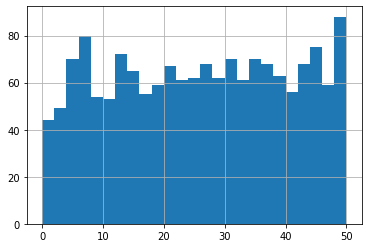

In [217]:
wine.price.hist(bins=25);

In [218]:
wine.price.replace([0.0], [None], inplace=True)

In [219]:
wine.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
label                    0
quality                  0
price                   17
dtype: int64

In [220]:
wine.loc[wine.price.notnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality,price
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5,42
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Bom,5,32
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Bom,5,13
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Muito bom,6,28
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Bom,5,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Bom,5,7
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Muito bom,6,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Muito bom,6,48
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Bom,5,37


In [221]:
wine.loc[wine.price.isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality,price
35,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,Muito bom,6,None
312,9.0,0.460,0.31,2.80,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,Muito bom,6,None
351,9.1,0.795,0.00,2.60,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,Muito bom,6,None
451,8.4,0.370,0.53,1.80,0.413,9.0,26.0,0.99790,3.06,1.06,9.1,Muito bom,6,None
661,7.5,0.420,0.31,1.60,0.080,15.0,42.0,0.99780,3.31,0.64,9.0,Bom,5,None
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,Bom,5,None
836,6.7,0.280,0.28,2.40,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,Excelente,7,None
890,7.2,0.340,0.24,2.00,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,Bom,5,None
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,Péssimo,3,None
906,7.2,0.540,0.27,2.60,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,Bom,5,None


# Atribuindo dados constantes e iteráveis!
Indo em outro caminho, atribuir dados é bem fácil. Você pode atribuir até valores constantes!


In [222]:
wine['Avaliadores'] = 'Todo mundo'

In [223]:
#Ou valores que iteram 
wine['índice invertido'] = range(len(wine), 0, -1)

In [224]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,quality,price,Avaliadores,índice invertido
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom,5,42,Todo mundo,1599
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bom,5,32,Todo mundo,1598
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bom,5,13,Todo mundo,1597
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Muito bom,6,28,Todo mundo,1596
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bom,5,35,Todo mundo,1595
